In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача классификации

## Подготовка данных

In [3]:
df_r = pd.read_csv('../data/classification/responses_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор лейблов из датасета
X = df_r.drop(['Gender_male', 'Gender_nan'], axis=1)
y = df_r['Gender_male']
X

Age  Height  Weight  Number of siblings  Music_2.0  Music_3.0  \
0     20.0   163.0    48.0                 1.0          0          0   
1     19.0   163.0    58.0                 2.0          0          0   
2     20.0   176.0    67.0                 2.0          0          0   
3     22.0   172.0    59.0                 1.0          0          0   
4     20.0   170.0    59.0                 1.0          0          0   
...    ...     ...     ...                 ...        ...        ...   
999   19.0   181.0    70.0                 1.0          0          0   
1000  16.0   153.0    62.0                 1.0          0          0   
1001  18.0   160.0    63.0                 2.0          0          0   
1002  22.0   181.0    72.0                 1.0          0          0   
1003  20.0   172.0    63.0                 1.0          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   
1001               0                       0                   0   
1002               0   

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:4])
X.iloc[:,:4] = pd.DataFrame(sc.transform(X.iloc[:,:4]))
X

Age    Height    Weight  Number of siblings  Music_2.0  Music_3.0  \
0    -0.146449 -1.061308 -1.345288           -0.294128          0          0   
1    -0.504197 -1.061308 -0.614248            0.703523          0          0   
2    -0.146449  0.249956  0.043688            0.703523          0          0   
3     0.569047 -0.153510 -0.541144           -0.294128          0          0   
4    -0.146449 -0.355243 -0.541144           -0.294128          0          0   
...        ...       ...       ...                 ...        ...        ...   
999  -0.504197  0.754288  0.263000           -0.294128          0          0   
1000 -1.577441 -2.069972 -0.321832           -0.294128          0          0   
1001 -0.861945 -1.363907 -0.248728            0.703523          0          0   
1002  0.569047  0.754288  0.409208           -0.294128          0          0   
1003 -0.146449 -0.153510 -0.248728           -0.294128          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Разделяем данные на обучение и тест с сохранением соотношения классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([399, 273])
dict_values([135, 197])


## Построение композиционных моделей

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models_y_pred = {
    'bagging' : [],
    'bagging__knn' : [],
    'bagging__tree' : [],
    'bagging__rf' : [],
    'bagging__nb' : [],
    'bagging__svm' : [],
    'bagging__lr' : [],
    'stacking_1layer__1' : [],
    'stacking_1layer__2' : [],
    'stacking_2layer__1' : [],
    'stacking_2layer__2' : [],
    'boosting__adaboost' : [],
    'boosting__adaboost__tree' : [],
    'boosting__adaboost__nb' : [],
    'boosting__adaboost__lr' : [],
    'boosting__gradboost_sk' : [],
    'boosting__gradboost_xg' : []
}

### Бэггинг (Bagging)

![image](https://upload.wikimedia.org/wikipedia/commons/c/c8/Ensemble_Bagging.svg)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

In [7]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[188   9]
 [ 31 104]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       197
           1       0.92      0.77      0.84       135

    accuracy                           0.88       332
   macro avg       0.89      0.86      0.87       332
weighted avg       0.88      0.88      0.88       332



#### Метод k-ближайших соседей (K-Nearest Neighbors)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = BaggingClassifier(KNeighborsClassifier())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__knn'] = y_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[169  28]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       197
           1       0.81      0.87      0.84       135

    accuracy                           0.86       332
   macro avg       0.86      0.86      0.86       332
weighted avg       0.86      0.86      0.86       332



#### Классификатор дерева решений (Decision Tree Classifier)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = BaggingClassifier(DecisionTreeClassifier())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__tree'] = y_pred.copy()

# В сравнении с моделью без бэггинга — качество несколько
# улучшилось, так как полнота нулевого класса увеличилась
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[187  10]
 [ 27 108]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       197
           1       0.92      0.80      0.85       135

    accuracy                           0.89       332
   macro avg       0.89      0.87      0.88       332
weighted avg       0.89      0.89      0.89       332



#### Классификатор случайный лес (Random Forest Classifier)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__rf'] = y_pred.copy()

# Вывод полностью аналогичен с предыдущим, только можно отметить, что случайный
# лес увеличивает полноту нулевого класса ещё больше, чем просто бэггинг деревьев
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[186  11]
 [ 20 115]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       197
           1       0.91      0.85      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332



#### Наивный байесовский классификатор (Naive Bayes)

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = BaggingClassifier(GaussianNB())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__nb'] = y_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 36 161]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.62      0.18      0.28       197
           1       0.41      0.84      0.55       135

    accuracy                           0.45       332
   macro avg       0.52      0.51      0.42       332
weighted avg       0.54      0.45      0.39       332



#### Метод опорных векторов (Support Vector Machines)

In [12]:
from sklearn import svm
classifier = BaggingClassifier(svm.SVC())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__svm'] = y_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



#### Логистическая регрессия (Logistic Regression)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = BaggingClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['bagging__lr'] = y_pred.copy()

# В сравнении с моделью без бэггинга — качество несколько
# улучшилось, так как полнота нулевого класса увеличилась
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.90      0.91      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



### Стекинг (Stacking)

![image.png](https://miro.medium.com/max/3582/1*XsTcX5N6FXQW1bGhS9hxJQ.png)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

In [14]:
from sklearn.ensemble import StackingClassifier

#### Однослойный стекинг

![image.png](https://miro.medium.com/max/1250/1*6XxziIgU0I7mpN50uh19jg.png)

In [15]:
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('knn_1', KNeighborsClassifier())
                ]

classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['stacking_1layer__1'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.90      0.91      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



In [16]:
# Добавим к базовым алгоритмам ещё наивный байесовский классификатор и построим новую модель
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('knn_1', KNeighborsClassifier()),
                 ('nb_1', GaussianNB())
                ]

classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['stacking_1layer__2'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       197
           1       0.91      0.93      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



#### Двухслойный стекинг

![image](https://miro.medium.com/max/3000/1*q98mnJbUPR6M7DkztDQXGA.png)

In [17]:
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('knn_1', KNeighborsClassifier())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier()),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

classifier = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['stacking_2layer__1'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182  15]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       197
           1       0.89      0.87      0.88       135

    accuracy                           0.90       332
   macro avg       0.90      0.90      0.90       332
weighted avg       0.90      0.90      0.90       332



In [18]:
# Добавим к каждому слою по алгоритму наивного баевского классификатора
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('knn_1', KNeighborsClassifier()),
                        ('nb_1', GaussianNB())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier()),
                        ('nb_2', GaussianNB())

                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

classifier = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['stacking_2layer__2'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[177  20]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       197
           1       0.86      0.93      0.90       135

    accuracy                           0.91       332
   macro avg       0.91      0.92      0.91       332
weighted avg       0.92      0.91      0.91       332



### Бустинг (Boosting)

![image](https://upload.wikimedia.org/wikipedia/commons/b/b5/Ensemble_Boosting.svg)

#### Адаптивный бустинг (Adaptive Boosting)

In [19]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__adaboost'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182  15]
 [  8 127]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       197
           1       0.89      0.94      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



##### Классификатор дерева решений (Decision Tree Classifier)

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = AdaBoostClassifier(DecisionTreeClassifier())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__adaboost__tree'] = y_pred.copy()

# В сравнении с моделью без бустинга — качество особо не изменилось
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[167  30]
 [ 28 107]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       197
           1       0.78      0.79      0.79       135

    accuracy                           0.83       332
   macro avg       0.82      0.82      0.82       332
weighted avg       0.83      0.83      0.83       332



##### Наивный байесовский классификатор (Naive Bayes)

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = AdaBoostClassifier(GaussianNB())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__adaboost__nb'] = y_pred.copy()

# В сравнении с моделью без бустинга — качество особо не изменилось,
# раньше алгоритм относил более 85% объектов к первому классу,
# теперь относит более 85% ко второму
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[183  14]
 [122  13]]
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       197
           1       0.48      0.10      0.16       135

    accuracy                           0.59       332
   macro avg       0.54      0.51      0.44       332
weighted avg       0.55      0.59      0.50       332



##### Логистическая регрессия (Logistic Regression)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = AdaBoostClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__adaboost__lr'] = y_pred.copy()

# В сравнении с моделью без бустинга — качество несколько улучшилось
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.91      0.92      0.91       135

    accuracy                           0.93       332
   macro avg       0.92      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



#### Градиентный бустинг из sklearn (Gradient Boosting)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__gradboost_sk'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[183  14]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



#### Градиентный бустинг из xgboost (Gradient Boosting)

In [24]:
from xgboost import XGBClassifier
classifier = XGBClassifier(use_label_encoder=False, verbosity=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
models_y_pred['boosting__gradboost_xg'] = y_pred.copy()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  13]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       197
           1       0.90      0.89      0.90       135

    accuracy                           0.92       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.92      0.92      0.92       332



## Подбор параметров

In [25]:
from sklearn.model_selection import RandomizedSearchCV

### Бэггинг (Bagging)

#### Метод k-ближайших соседей (K-Nearest Neighbors)

In [26]:
classifier = BaggingClassifier(KNeighborsClassifier())
classifier.get_params()

{'base_estimator__algorithm': 'auto',
 'base_estimator__leaf_size': 30,
 'base_estimator__metric': 'minkowski',
 'base_estimator__metric_params': None,
 'base_estimator__n_jobs': None,
 'base_estimator__n_neighbors': 5,
 'base_estimator__p': 2,
 'base_estimator__weights': 'uniform',
 'base_estimator': KNeighborsClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__n_neighbors' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[177  20]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       197
           1       0.86      0.90      0.88       135

    accuracy                           0.90       332
   macro avg       0.90      0.90      0.90       332
weighted avg       0.90      0.90      0.90       332

Наилучшие параметры
{'n_estimators': 140, 'max_samples': 0.6000000000000001, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__n_neighbors': 24}
Wall time: 15.7 s


In [28]:
y_pred = models_y_pred['bagging__knn']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[169  28]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       197
           1       0.81      0.87      0.84       135

    accuracy                           0.86       332
   macro avg       0.86      0.86      0.86       332
weighted avg       0.86      0.86      0.86       332



In [29]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('param_base_estimator__n_neighbors')
axs[2].plot(estimator.cv_results_['param_base_estimator__n_neighbors'].data, res, '*');

#### Классификатор дерева решений (Decision Tree Classifier)

In [30]:
classifier = BaggingClassifier(DecisionTreeClassifier())
classifier.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__max_depth' : list(range(0, 25)),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.89434524 0.87946429        nan 0.91517857 0.89285714 0.90178571
 0.89583333 0.88541667        nan 0.88392857]
  warnings.warn(


Наилучший оценщик
[[187  10]
 [ 20 115]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       197
           1       0.92      0.85      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.91       332
weighted avg       0.91      0.91      0.91       332

Наилучшие параметры
{'n_estimators': 130, 'max_samples': 0.4, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator__max_depth': 14}
Wall time: 33.9 s


In [32]:
y_pred = models_y_pred['bagging__tree']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[187  10]
 [ 27 108]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       197
           1       0.92      0.80      0.85       135

    accuracy                           0.89       332
   macro avg       0.89      0.87      0.88       332
weighted avg       0.89      0.89      0.89       332



In [33]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('base_estimator__max_depth')
axs[2].plot(estimator.cv_results_['param_base_estimator__max_depth'].data, res, '*');


#### Классификатор случайный лес (Random Forest Classifier)

In [34]:
classifier = BaggingClassifier(RandomForestClassifier())
classifier.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__max_depth' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[188   9]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       197
           1       0.93      0.88      0.90       135

    accuracy                           0.92       332
   macro avg       0.93      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 100, 'max_samples': 0.8, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__max_depth': 18}
Wall time: 6min 36s


In [36]:
y_pred = models_y_pred['bagging__rf']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[186  11]
 [ 20 115]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       197
           1       0.91      0.85      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332



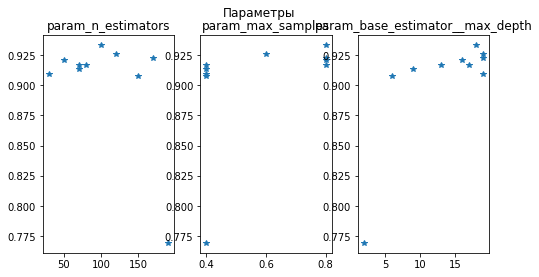

In [37]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('param_base_estimator__max_depth')
axs[2].plot(estimator.cv_results_['param_base_estimator__max_depth'].data, res, '*');

#### Наивный байесовский классификатор (Naive Bayes)

In [38]:
classifier = BaggingClassifier(GaussianNB())
classifier.get_params()

{'base_estimator__priors': None,
 'base_estimator__var_smoothing': 1e-09,
 'base_estimator': GaussianNB(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
%%time
n = 15
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__var_smoothing': np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1)))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[180  17]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       197
           1       0.88      0.93      0.90       135

    accuracy                           0.92       332
   macro avg       0.91      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 60, 'max_samples': 0.2, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__var_smoothing': 1.7000000000000002}
Wall time: 45.6 s


In [40]:
y_pred = models_y_pred['bagging__nb']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[ 36 161]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.62      0.18      0.28       197
           1       0.41      0.84      0.55       135

    accuracy                           0.45       332
   macro avg       0.52      0.51      0.42       332
weighted avg       0.54      0.45      0.39       332



In [41]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('param_base_estimator__var_smoothing')
axs[2].plot(estimator.cv_results_['param_base_estimator__var_smoothing'].data, res, '*');

#### Метод опорных векторов (Support Vector Machines)

In [42]:
classifier = BaggingClassifier(svm.SVC())
classifier.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__break_ties': False,
 'base_estimator__cache_size': 200,
 'base_estimator__class_weight': None,
 'base_estimator__coef0': 0.0,
 'base_estimator__decision_function_shape': 'ovr',
 'base_estimator__degree': 3,
 'base_estimator__gamma': 'scale',
 'base_estimator__kernel': 'rbf',
 'base_estimator__max_iter': -1,
 'base_estimator__probability': False,
 'base_estimator__random_state': None,
 'base_estimator__shrinking': True,
 'base_estimator__tol': 0.001,
 'base_estimator__verbose': False,
 'base_estimator': SVC(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__kernel' : ['sigmoid', 'poly', 'rbf', 'linear'],
    'base_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[185  12]
 [ 14 121]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       197
           1       0.91      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 90, 'max_samples': 0.6000000000000001, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__kernel': 'rbf', 'base_estimator__C': 1000.0}
Wall time: 1min 19s


In [44]:
y_pred = models_y_pred['bagging__svm']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[184  13]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



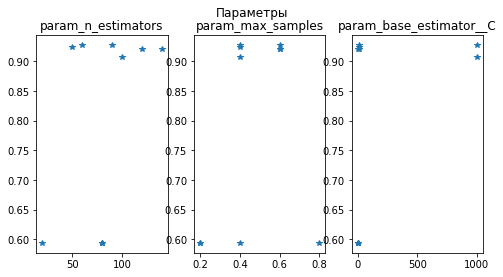

In [45]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('param_base_estimator__C')
axs[2].plot(estimator.cv_results_['param_base_estimator__C'].data, res, '*');

#### Логистическая регрессия (Logistic Regression)


In [46]:
classifier = BaggingClassifier(LogisticRegression())
classifier.get_params()

{'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__penalty' : ['l1', 'l2'],
    'base_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.93154762 0.93154762 0.93005952        nan
        nan        nan 0.92113095 0.92559524]
  warnings.warn(


Наилучший оценщик
[[182  15]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.89      0.92      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 190, 'max_samples': 0.2, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__penalty': 'l2', 'base_estimator__C': 100000.0}
Wall time: 29.7 s


In [48]:
y_pred = models_y_pred['bagging__lr']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[184  13]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.90      0.91      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



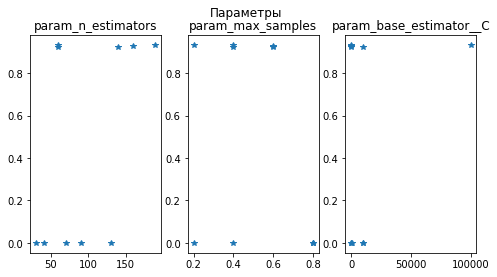

In [49]:
res = estimator.cv_results_['mean_test_score']
res[np.isnan(res)] = 0

fig, axs = plt.subplots(1, 3)
fig.set_figheight(4)
fig.set_figwidth(8)
fig.suptitle('Параметры')

axs[0].set_title('param_n_estimators')
axs[0].plot(estimator.cv_results_['param_n_estimators'].data, res, '*')
axs[1].set_title('param_max_samples')
axs[1].plot(estimator.cv_results_['param_max_samples'].data, res, '*')
axs[2].set_title('param_base_estimator__C')
axs[2].plot(estimator.cv_results_['param_base_estimator__C'].data, res, '*');

### Стекинг (Stacking)

#### Однослойный стекинг

In [50]:
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('knn_1', KNeighborsClassifier())
                ]

classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
classifier.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestClassifier()),
  ('knn_1', KNeighborsClassifier())],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator__l1_ratio': None,
 'final_estimator__max_iter': 100,
 'final_estimator__multi_class': 'auto',
 'final_estimator__n_jobs': None,
 'final_estimator__penalty': 'l2',
 'final_estimator__random_state': None,
 'final_estimator__solver': 'lbfgs',
 'final_estimator__tol': 0.0001,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': LogisticRegression(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'rf_1': RandomForestClassifier(),
 'knn_1': KNeighborsClassifier(),
 'rf_1__bootstrap': True,
 'rf_1__ccp_alpha': 0.0,
 'rf_1__class_weight': None,
 'rf_1__criterion': 'gini',
 'rf_1__max_depth': None,
 'rf_1__max_features': 'au

In [51]:
%%time
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'knn_1__n_neighbors' : list(range(2, 25)),
    'final_estimator__penalty' : ['l1', 'l2'],
    'final_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.59375           nan 0.62053571        nan        nan 0.92261905
 0.60119048        nan 0.94047619        nan]
  warnings.warn(


Наилучший оценщик
[[185  12]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       197
           1       0.91      0.92      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332

Наилучшие параметры
{'rf_1__max_depth': 7, 'knn_1__n_neighbors': 14, 'final_estimator__penalty': 'l2', 'final_estimator__C': 10.0}
Wall time: 17.9 s


In [52]:
y_pred = models_y_pred['stacking_1layer__1']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[184  13]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.90      0.91      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



In [53]:
# Добавим к базовым алгоритмам ещё наивный байесовский классификатор и построим новую модель
base_learners = [
                 ('rf_1', RandomForestClassifier()),
                 ('knn_1', KNeighborsClassifier()),
                 ('nb_1', GaussianNB())
                ]

classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
classifier.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestClassifier()),
  ('knn_1', KNeighborsClassifier()),
  ('nb_1', GaussianNB())],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator__l1_ratio': None,
 'final_estimator__max_iter': 100,
 'final_estimator__multi_class': 'auto',
 'final_estimator__n_jobs': None,
 'final_estimator__penalty': 'l2',
 'final_estimator__random_state': None,
 'final_estimator__solver': 'lbfgs',
 'final_estimator__tol': 0.0001,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': LogisticRegression(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'rf_1': RandomForestClassifier(),
 'knn_1': KNeighborsClassifier(),
 'nb_1': GaussianNB(),
 'rf_1__bootstrap': True,
 'rf_1__ccp_alpha': 0.0,
 'rf_1__class_weight': None,
 'rf_1__criterion': 'gini',
 'r

In [54]:
%%time
n = 15
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'knn_1__n_neighbors' : list(range(2, 25)),
    'nb_1__var_smoothing': np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1))),
    'final_estimator__penalty' : ['l1', 'l2'],
    'final_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.59375           nan 0.94047619        nan        nan
 0.94047619 0.9389881         nan        nan]
  warnings.warn(


Наилучший оценщик
[[183  14]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.90      0.92      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.93      0.92      0.92       332

Наилучшие параметры
{'rf_1__max_depth': 16, 'nb_1__var_smoothing': 3.0000000000000004, 'knn_1__n_neighbors': 21, 'final_estimator__penalty': 'l2', 'final_estimator__C': 1000.0}
Wall time: 41.8 s


In [55]:
y_pred = models_y_pred['stacking_1layer__2']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[184  13]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       197
           1       0.91      0.93      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



#### Двухслойный стекинг

In [56]:
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('knn_1', KNeighborsClassifier())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier()),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

classifier = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
classifier.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestClassifier()),
  ('knn_1', KNeighborsClassifier())],
 'final_estimator__cv': None,
 'final_estimator__estimators': [('tree_2', DecisionTreeClassifier()),
  ('rf_2', RandomForestClassifier())],
 'final_estimator__final_estimator__C': 1.0,
 'final_estimator__final_estimator__class_weight': None,
 'final_estimator__final_estimator__dual': False,
 'final_estimator__final_estimator__fit_intercept': True,
 'final_estimator__final_estimator__intercept_scaling': 1,
 'final_estimator__final_estimator__l1_ratio': None,
 'final_estimator__final_estimator__max_iter': 100,
 'final_estimator__final_estimator__multi_class': 'auto',
 'final_estimator__final_estimator__n_jobs': None,
 'final_estimator__final_estimator__penalty': 'l2',
 'final_estimator__final_estimator__random_state': None,
 'final_estimator__final_estimator__solver': 'lbfgs',
 'final_estimator__final_estimator__tol': 0.0001,
 'final_estimator__final_estimator__verbose': 0,
 'final_esti

In [57]:
%%time
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'knn_1__n_neighbors' : list(range(2, 25)),
    'final_estimator__tree_2__max_depth' : list(range(2, 25)),
    'final_estimator__rf_2__max_depth' : list(range(2, 25)),
    'final_estimator__final_estimator__penalty' : ['l1', 'l2'],
    'final_estimator__final_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91964286 0.9389881  0.92857143 0.92261905        nan
 0.9389881         nan 0.91220238 0.92708333]
  warnings.warn(


Наилучший оценщик
[[179  18]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       197
           1       0.87      0.91      0.89       135

    accuracy                           0.91       332
   macro avg       0.90      0.91      0.91       332
weighted avg       0.91      0.91      0.91       332

Наилучшие параметры
{'rf_1__max_depth': 4, 'knn_1__n_neighbors': 19, 'final_estimator__tree_2__max_depth': 2, 'final_estimator__rf_2__max_depth': 24, 'final_estimator__final_estimator__penalty': 'l2', 'final_estimator__final_estimator__C': 1000.0}
Wall time: 46.6 s


In [58]:
y_pred = models_y_pred['stacking_2layer__1']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[182  15]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       197
           1       0.89      0.87      0.88       135

    accuracy                           0.90       332
   macro avg       0.90      0.90      0.90       332
weighted avg       0.90      0.90      0.90       332



In [59]:
# Добавим к каждому слою по алгоритму наивного баевского классификатора
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier()),
                        ('knn_1', KNeighborsClassifier()),
                        ('nb_1', GaussianNB())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier()),
                        ('nb_2', GaussianNB())

                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

classifier = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
classifier.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestClassifier()),
  ('knn_1', KNeighborsClassifier()),
  ('nb_1', GaussianNB())],
 'final_estimator__cv': None,
 'final_estimator__estimators': [('tree_2', DecisionTreeClassifier()),
  ('rf_2', RandomForestClassifier()),
  ('nb_2', GaussianNB())],
 'final_estimator__final_estimator__C': 1.0,
 'final_estimator__final_estimator__class_weight': None,
 'final_estimator__final_estimator__dual': False,
 'final_estimator__final_estimator__fit_intercept': True,
 'final_estimator__final_estimator__intercept_scaling': 1,
 'final_estimator__final_estimator__l1_ratio': None,
 'final_estimator__final_estimator__max_iter': 100,
 'final_estimator__final_estimator__multi_class': 'auto',
 'final_estimator__final_estimator__n_jobs': None,
 'final_estimator__final_estimator__penalty': 'l2',
 'final_estimator__final_estimator__random_state': None,
 'final_estimator__final_estimator__solver': 'lbfgs',
 'final_estimator__final_estimator__tol': 0.0001,
 'final_e

In [60]:
%%time
n = 15
parameters = {
    'knn_1__n_neighbors' : list(range(2, 25)),
    'nb_1__var_smoothing' : np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1))),
    'final_estimator__rf_2__max_depth' : list(range(2, 25)),
    'final_estimator__nb_2__var_smoothing' : np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1))),
    'final_estimator__final_estimator__penalty' : ['l1', 'l2'],
    'final_estimator__final_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.9389881  0.94791667 0.94047619        nan        nan 0.59375
 0.92410714        nan        nan 0.9360119 ]
  warnings.warn(


Наилучший оценщик
[[182  15]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.89      0.92      0.91       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'nb_1__var_smoothing': 1.2000000000000002, 'knn_1__n_neighbors': 10, 'final_estimator__rf_2__max_depth': 21, 'final_estimator__nb_2__var_smoothing': 2.2, 'final_estimator__final_estimator__penalty': 'l2', 'final_estimator__final_estimator__C': 100000.0}
Wall time: 48.7 s


In [61]:
y_pred = models_y_pred['stacking_2layer__2']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[177  20]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       197
           1       0.86      0.93      0.90       135

    accuracy                           0.91       332
   macro avg       0.91      0.92      0.91       332
weighted avg       0.92      0.91      0.91       332



### Бустинг (Boosting)

#### Адаптивный бустинг (Adaptive Boosting)

In [62]:
classifier = AdaBoostClassifier()
classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [63]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91666667 0.92261905 0.92261905 0.91220238 0.91964286 0.90922619
 0.91666667 0.91964286        nan 0.91964286]
  warnings.warn(


Наилучший оценщик
[[185  12]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       197
           1       0.91      0.92      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332

Наилучшие параметры
{'n_estimators': 130, 'learning_rate': 0.75}
Wall time: 6.63 s


In [64]:
y_pred = models_y_pred['boosting__adaboost']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[182  15]
 [  8 127]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       197
           1       0.89      0.94      0.92       135

    accuracy                           0.93       332
   macro avg       0.93      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



##### Классификатор дерева решений (Decision Tree Classifier)

In [65]:
classifier = AdaBoostClassifier(DecisionTreeClassifier())
classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [66]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__max_depth' : list(range(0, 25)),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.79613095 0.91517857        nan 0.79017857 0.78869048 0.79166667
 0.79761905 0.79613095        nan 0.87946429]
  warnings.warn(


Наилучший оценщик
[[179  18]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       197
           1       0.87      0.93      0.90       135

    accuracy                           0.92       332
   macro avg       0.91      0.92      0.91       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 70, 'learning_rate': 0.7000000000000001, 'base_estimator__max_depth': 1}
Wall time: 3.52 s


In [67]:
y_pred = models_y_pred['boosting__adaboost__tree']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[167  30]
 [ 28 107]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       197
           1       0.78      0.79      0.79       135

    accuracy                           0.83       332
   macro avg       0.82      0.82      0.82       332
weighted avg       0.83      0.83      0.83       332



##### Наивный байесовский классификатор (Naive Bayes)

In [68]:
classifier = AdaBoostClassifier(GaussianNB())
classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__priors': None,
 'base_estimator__var_smoothing': 1e-09,
 'base_estimator': GaussianNB(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [69]:
%%time
n = 15
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__var_smoothing': np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1)))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[180  17]
 [  7 128]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       197
           1       0.88      0.95      0.91       135

    accuracy                           0.93       332
   macro avg       0.92      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332

Наилучшие параметры
{'n_estimators': 40, 'learning_rate': 0.45, 'base_estimator__var_smoothing': 1.4000000000000001}
Wall time: 35 s


In [70]:
y_pred = models_y_pred['boosting__adaboost__nb']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[183  14]
 [122  13]]
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       197
           1       0.48      0.10      0.16       135

    accuracy                           0.59       332
   macro avg       0.54      0.51      0.44       332
weighted avg       0.55      0.59      0.50       332



##### Логистическая регрессия (Logistic Regression)

In [71]:
classifier = AdaBoostClassifier(LogisticRegression())
classifier.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [72]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__penalty' : ['l1', 'l2'],
    'base_estimator__C': np.power(10.0, np.arange(-3, 6))
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[182  15]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       197
           1       0.89      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.91      0.91      0.91       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'n_estimators': 90, 'learning_rate': 0.4, 'base_estimator__penalty': 'l2', 'base_estimator__C': 100.0}
Wall time: 3.85 s


d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.92113095        nan 0.92113095 0.92410714
        nan 0.92410714        nan 0.92113095]
  warnings.warn(


In [73]:
y_pred = models_y_pred['boosting__adaboost__lr']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[184  13]
 [ 11 124]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.91      0.92      0.91       135

    accuracy                           0.93       332
   macro avg       0.92      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



#### Градиентный бустинг из sklearn (Gradient Boosting)

In [74]:
classifier = GradientBoostingClassifier()
classifier.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [75]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'max_features' : ['auto','sqrt', 'log2'],
    'max_depth' : list(range(0, 25)),
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88690476 0.8125     0.8452381  0.89136905 0.79464286
 0.91220238 0.79166667 0.80505952 0.90178571]
  warnings.warn(


Наилучший оценщик
[[187  10]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       197
           1       0.92      0.84      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332

Наилучшие параметры
{'n_estimators': 40, 'max_features': 'sqrt', 'max_depth': 17, 'learning_rate': 0.45}
Wall time: 14.2 s


In [76]:
y_pred = models_y_pred['boosting__gradboost_sk']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[183  14]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



#### Градиентный бустинг из xgboost (Gradient Boosting)

In [77]:
classifier = XGBClassifier(use_label_encoder=False, verbosity=0)
classifier.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0}

In [78]:
%%time
parameters = {
    'n_estimators': range(0, 200, 10),
    'max_depth' : list(range(0, 25)),
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
estimator = RandomizedSearchCV(classifier, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[184  13]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

Наилучшие параметры
{'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 1.2, 'n_estimators': 170, 'max_depth': 24, 'colsample_bytree': 0.8}
Wall time: 30.2 s


In [79]:
y_pred = models_y_pred['boosting__gradboost_sk']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[183  14]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       197
           1       0.90      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332

